<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/SusySecondoEsperimento1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# file con i dati di tutti i ristoranti random
sort = 'Random'

relevance = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [21]:
#RACCOLTA DATI

#Percentuali di maschi e femmine sopra e sotto i 40, per ogni ristorante

# converto le stringhe di age in int
res.age = pd.to_numeric(res.age, errors='coerce').fillna(0).astype(np.int64)


totaleAmerican = len(res[((res['ethnicity'] == 'white') | (res['ethnicity'] == 'black or african american'))])
americanU30 = (len(res[((res['ethnicity'] == 'white') | (res['ethnicity'] == 'black or african american')) & (res['age'] <= 30)]) * 100) / totaleAmerican
americanU40 = (len(res[((res['ethnicity'] == 'white') | (res['ethnicity'] == 'black or african american')) & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleAmerican
americanU55 = (len(res[((res['ethnicity'] == 'white') | (res['ethnicity'] == 'black or african american')) & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleAmerican
americanOver = (len(res[((res['ethnicity'] == 'white') | (res['ethnicity'] == 'black or african american')) & (res['age'] > 55)]) * 100) / totaleAmerican
print(americanU30)
print(americanU40)
print(americanU55)
print(americanOver)


totaleMexican = len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin')])
mexicanU30 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] <= 30)]) * 100) / totaleMexican
mexicanU40 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleMexican
mexicanU55 = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleMexican
mexicanOver = (len(res[(res['ethnicity'] == 'hispanic, latino, or spanish origin') & (res['age'] > 55)]) * 100) / totaleMexican
print(mexicanU30)
print(mexicanU40)
print(mexicanU55)
print(mexicanOver)

totaleAsian = len(res[(res['ethnicity'] == 'asian')])
asianU30 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] <= 30)]) * 100) / totaleAsian
asianU40 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 30) & (res['age'] <= 40)]) * 100) / totaleAsian
asianU55 = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 40) & (res['age'] <= 55)]) * 100) / totaleAsian
asianOver = (len(res[(res['ethnicity'] == 'asian') & (res['age'] > 55)]) * 100) / totaleAsian
print(asianU30)
print(asianU40)
print(asianU55)
print(asianOver)


22.05853075851085
44.33605415090583
25.204061317937487
8.401353772645828
38.22784810126582
46.075949367088604
14.0084388185654
1.6877637130801688
29.09196067090804
57.54771544245229
11.336032388663968
2.0242914979757085


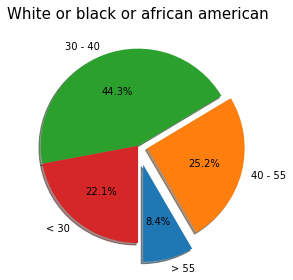

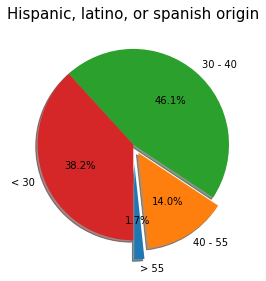

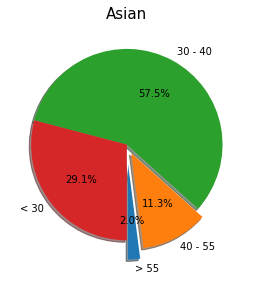

In [28]:
labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [americanOver, americanU55, americanU40, americanU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("White or black or african american", fontsize = 15)
fig.tight_layout()

labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [mexicanOver, mexicanU55, mexicanU40, mexicanU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 15)
fig.tight_layout()

labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [asianOver, asianU55, asianU40, asianU30] 
explode = [0.2, 0.1, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("Asian", fontsize = 15)
fig.tight_layout()


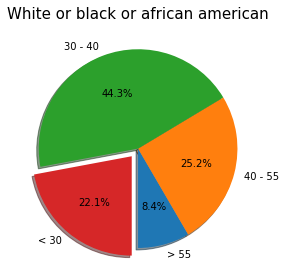

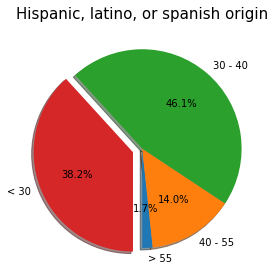

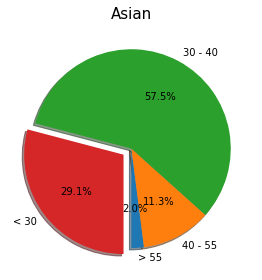

In [27]:
labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [americanOver, americanU55, americanU40, americanU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("White or black or african american", fontsize = 15)
fig.tight_layout()

labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [mexicanOver, mexicanU55, mexicanU40, mexicanU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("Hispanic, latino, or spanish origin", fontsize = 15)
fig.tight_layout()

labels = ['> 55', '40 - 55', '30 - 40', '< 30'  ]
sizes = [asianOver, asianU55, asianU40, asianU30] 
explode = [0, 0, 0, 0.1]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90)
ax1.set_title("Asian", fontsize = 15)
fig.tight_layout()